In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import normalize,scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import keras

In [3]:
import os

In [4]:
import gc

gc.collect()

21

In [5]:
import os
import torch
import torchvision
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline

from torch.utils.data import random_split
from torch.utils.data import DataLoader

In [6]:

Uninfected_path = r"D:\kodlar\Lecture proggraming\ödevler\CNN MALARİA DATASET\archive\cell_images\Uninfected"
Infected_path = r"D:\kodlar\Lecture proggraming\ödevler\CNN MALARİA DATASET\archive\cell_images\Parasitized"

Uninfected = os.listdir(Uninfected_path)
Infected = os.listdir(Infected_path)

for i, name in enumerate(Uninfected):
    if name[-3:] != "png":
        print(f'{i} : {name}')
        print('Removed : ', Uninfected.pop(i))
        break

for i, name in enumerate(Infected):
    if name[-3:] != "png":
        print(f'{i} : {name}')
        print('Removed : ', Infected.pop(i))
        break
        
print("Uninfected = ", len(Uninfected))
print("Infected = ", len(Infected))
print("Total = ", len(Uninfected)+len(Infected))

0 : .ipynb_checkpoints
Removed :  .ipynb_checkpoints
Uninfected =  13779
Infected =  13779
Total =  27558


Infected


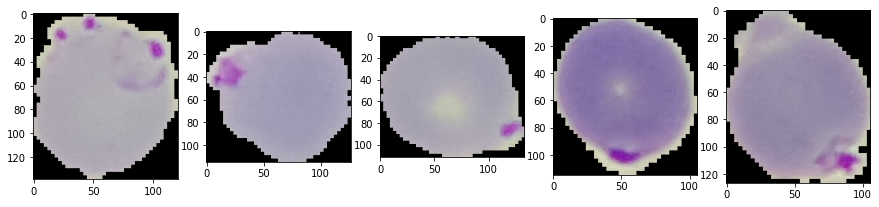

In [7]:
import random

view_infected = random.sample(Infected, 5)

print("Infected")
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    path = Infected_path + '/' + view_infected[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

Uninfected


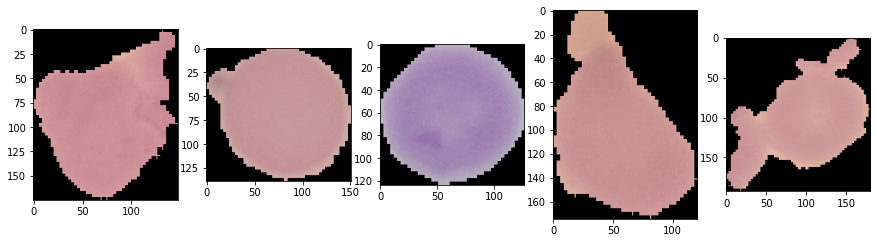

In [8]:
view_uninfected = random.sample(Uninfected, 5)

print("Uninfected")
fig, ax = plt.subplots(1, 5, figsize=(15,5))
for i in range(5):
    path = Uninfected_path + '/' + view_uninfected[i]
    image = Image.open(path)
    ax[i].imshow(image)

plt.show()

In [9]:
cells = list()
label = list()

IMG_SIZE = (64, 64)

try:
    cells = np.load('cells.npy')
    label = np.load('label.npy')
except FileNotFoundError:
    print("Processed files not found. \nProcessing...")

    for name in tqdm(Infected):
        path = Infected_path + '/' + name
        image = Image.open(path)
        image_data = np.array(image.resize(IMG_SIZE))
        cells.append(image_data)
        label.append(1)


    for name in tqdm(Uninfected):
        path = Uninfected_path + '/' + name
        image = Image.open(path)
        image_data = np.array(image.resize((64,64)))
        cells.append(image_data)
        label.append(0)


    cells = (np.array(cells).astype(float))/255
    label = np.array(label)
    
    np.save('cells.npy', cells)
    np.save('label.npy', label)

print(f'Cells Shape: {cells.shape} | Cells Dtype : {cells.dtype}')
print(f'Labels Shape: {label.shape} | Labels Dtype : {label.dtype}')

Cells Shape: (27558, 64, 64, 3) | Cells Dtype : float64
Labels Shape: (27558,) | Labels Dtype : int32


In [10]:
cells_train=cells[:20000]
cells_test=cells[20000:]

In [13]:
label_train=label[:20000]


In [14]:
label_test=label[20000:]

In [15]:
cells.shape,label.shape

((27558, 64, 64, 3), (27558,))

In [16]:
model=keras.Sequential([keras.layers.InputLayer(input_shape=(64,64,3)),
                        keras.layers.Reshape(target_shape=(64,64,3)),
                        keras.layers.Conv2D(filters=12,kernel_size=(3,3),activation=tf.nn.relu),
                        keras.layers.MaxPooling2D(pool_size=(2,2)),
                        keras.layers.Flatten(),
                        keras.layers.Dense(12)
                        ]) # CNN-Convolutional Neural Network

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [18]:
model.fit(cells_train,label_train,validation_split=0.1,epochs=50)

Epoch 1/50
563/563 [==============================] - 8s 13ms/step - loss: 0.5018 - accuracy: 0.7738 - val_loss: 1.2647 - val_accuracy: 0.1410
Epoch 2/50
563/563 [==============================] - 7s 13ms/step - loss: 0.4364 - accuracy: 0.8051 - val_loss: 1.7166 - val_accuracy: 0.0980
Epoch 3/50
563/563 [==============================] - 7s 13ms/step - loss: 0.4007 - accuracy: 0.8250 - val_loss: 1.7470 - val_accuracy: 0.1525
Epoch 4/50
563/563 [==============================] - 8s 13ms/step - loss: 0.3634 - accuracy: 0.8477 - val_loss: 2.9300 - val_accuracy: 0.0615
Epoch 5/50
563/563 [==============================] - 8s 14ms/step - loss: 0.3235 - accuracy: 0.8707 - val_loss: 2.3644 - val_accuracy: 0.0690
Epoch 6/50
563/563 [==============================] - 8s 14ms/step - loss: 0.2947 - accuracy: 0.8903 - val_loss: 2.6588 - val_accuracy: 0.0745
Epoch 7/50
563/563 [==============================] - 8s 14ms/step - loss: 0.2722 - accuracy: 0.8991 - val_loss: 2.9267 - val_accuracy: 0.0545

In [19]:
accuracy=model.evaluate(cells_test,label_test)

237/237 [==============================] - 1s 5ms/step - loss: 2.0843 - accuracy: 0.6152
